<a href="https://colab.research.google.com/github/tpenanen/Laptop-Price-Project/blob/main/Clustering_(Non_Pipeline).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import mean_squared_error
data = pd.read_csv('laptop_price.csv', encoding = 'latin1')
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
# This is the complete label-encoding needed for clutering:

#COMPANY LABEL ENCODING
name = data["Company"]
Company_names = []
Acer_count = Apple_count=Asus_count=Chuwi_count = Dell_count = Fujitsu_count= Google_count = HP_count = Huawei_count = Lenovo_count = LG_count = Media_count = Microsoft_count=0
Msi_count = razer_count = samsung_count = toshi_count = vero_count = Xiaomi_count = 0
for c in name:
  c = c.strip()
  if c == "Acer":
    Acer_count+=1
    Company_names.append("Acer")
  if c == "Apple":
    Apple_count+=1
    Company_names.append("Apple")
  if c == "Asus":
    Asus_count+=1
    Company_names.append("Asus")
  if c == "Chuwi":
    Chuwi_count+=1
    Company_names.append("Chuwi")
  if c == "Dell":
    Dell_count+=1
    Company_names.append("Dell")
  if c == "Fujitsu":
    Fujitsu_count+=1
    Company_names.append("Fujitsu")
  if c == "Google":
    Google_count+=1
    Company_names.append("Google")
  if c == "HP":
    HP_count+=1
    Company_names.append("HP")
  if c == "Huawei":
    Huawei_count+=1
    Company_names.append("Huawei")
  if c == "Lenovo":
    Lenovo_count+=1
    Company_names.append("Lenovo")
  if c == "LG":
    LG_count+=1
    Company_names.append("LG")
  if c == "Mediacom":
    Media_count+=1
    Company_names.append("Mediacom")
  if c == "Microsoft":
    Microsoft_count+=1
    Company_names.append("Microsoft")
  if c == "MSI":
    Msi_count+=1
    Company_names.append("MSI")
  if c == "Razer":
    Company_names.append("Razer")
    razer_count+=1
  if c == "Samsung":
    Company_names.append("Samsung")
    samsung_count+=1
  if c == "Toshiba":
    Company_names.append("Toshiba")
    toshi_count+=1
  if c == "Vero":
    Company_names.append("Vero")
    vero_count+=1
  if c == "Xiaomi":
    Company_names.append("Xiaomi")
    Xiaomi_count+=1


data["Company_converted"] = Company_names

le = LabelEncoder()
data['Company_Label'] = le.fit_transform(data['Company_converted'])

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

#END OF LABEL ENCODING FOR COMPANY


#START OF LABEL ENCODING FOR TYPENAME
Type = data["TypeName"]
note_count = 0
ultra_count = 0
conv_count = 0
gaming_count = 0
net_count = 0
work_count = 0
print(data["TypeName"].unique())
Type_names = []
for t in Type:
  if t == "Notebook":
    note_count +=1
    Type_names.append("Notebook")
  if t == "Ultrabook":
    ultra_count += 1
    Type_names.append("Ultrabook")
  if t == "2 in 1 Convertible":
    conv_count += 1
    Type_names.append("Convertible")
  if t == "Gaming":
    Type_names.append("Gaming")
    gaming_count += 1
  if t == "Netbook":
    net_count += 1
    Type_names.append("Netbook")
  if t == "Workstation":
    Type_names.append("Workstation")
    work_count += 1
print(note_count)
print(ultra_count)
print(conv_count)
print(gaming_count)
print(net_count)
print(work_count)

data["TypeName_converted"] = Type_names

le = LabelEncoder()
data['TypeName_Label'] = le.fit_transform(data['TypeName_converted'])

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
#END OF LABEL ENCODING FOR TYPENAME



#START OF ENCODING FOR CPU
import pandas as pd
from sklearn.preprocessing import LabelEncoder
CPU = data["Cpu"]
Cpu_brands = []
for m in CPU:
  Cpu_split= m.split(" ")
  if Cpu_split[0] == "Intel":
    if Cpu_split[1] == "Core":
      if Cpu_split[2] == "i3":
        Cpu_brands.append("Core i3")
      if Cpu_split[2] == "i5":
        Cpu_brands.append("Core i5")
      if Cpu_split[2] == "i7":
        Cpu_brands.append("Core i7")
      if Cpu_split[2] == "M":
        Cpu_brands.append("Core M")
    if Cpu_split[1] == "Xeon":
      Cpu_brands.append("Xeon")
    if Cpu_split[1] == "Pentium":
      Cpu_brands.append("Pentium")
    if Cpu_split[1] == "Celeron":
      Cpu_brands.append("Celeron")
    if Cpu_split[1] == "Atom":
      Cpu_brands.append("Atom")

  if Cpu_split[0] == "AMD":
    Cpu_brands.append("AMD")

  if Cpu_split[0] == "Samsung":
    Cpu_brands.append("Samsung")



data["Cpu_Brands"] = Cpu_brands

le = LabelEncoder()
data['Cpu_Brands_Label'] = le.fit_transform(data['Cpu_Brands'])

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
#END OF ENCODING FOR CPU


# START OF ENCODING OF RAM
print(data["Ram"].unique())
ram = data["Ram"]
ram_types = []
count_2=count_4=count_6=count_8=count_12=count_16=count_24=count_32=count_64=0
for r in ram:
  if r == "2GB":
    ram_types.append("2")
    count_2+=1
  if r == "4GB":
    count_4+=1
    ram_types.append("4")
  if r == "6GB":
    count_6 +=1
    ram_types.append("6")
  if r == "8GB":
    count_8+=1
    ram_types.append("8")
  if r == "12GB":
    count_12+=1
    ram_types.append("12")
  if r == "16GB":
    count_16+=1
    ram_types.append("16")
  if r == "24GB":
    count_24+=1
    ram_types.append("24")
  if r == "32GB":
    count_32+=1
    ram_types.append("32")
  if r == "64GB":
    count_64+=1
    ram_types.append("64")

data["Ram_types"] = ram_types
#END OF ENCODING FOR RAM

#START OF ENCODING GPU
a = data['Gpu']
intel_count = 0
Nvidia_count = 0
Amd_count = 0
Gpu_brands = []
for i in a:
  m = i.split(" ")
  if m[0] == "Intel":
    intel_count +=1
    Gpu_brands.append("Intel")
  if m[0] == "Nvidia":
    Nvidia_count += 1
    Gpu_brands.append("Nvidia")
  if m[0] == "AMD":
    Amd_count +=1
    Gpu_brands.append("AMD")
  if m[0] == "ARM":
    Gpu_brands.append("ARM")
print(intel_count)
print(Nvidia_count)
print(Amd_count)
print(intel_count+Amd_count+Nvidia_count)
data["Gpu_Brands"] = Gpu_brands

le = LabelEncoder()
data['Gpu_Brands_Label'] = le.fit_transform(data['Gpu_Brands'])

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
#END OF ENCODING GPU

#START OF ENCODING FOR OPERATING SYSTEM
OP = data["OpSys"]
op_systems = []
for o in OP:
  if o == "Windows 10":
    op_systems.append("Windows 10")
  if o == "Windows 10 S":
    op_systems.append("Windows 10")
  if o == "Windows 7":
    op_systems.append("Windows 7")
  if o == "Linux":
    op_systems.append("Linux")
  if o == "Mac OS X":
    op_systems.append("Mac OS")
  if o == "macOS":
    op_systems.append("Mac OS")
  if o == "No OS":
    op_systems.append("No OS")
  if o == "Chrome OS":
    op_systems.append("Chrome OS")
  if o == "Android":
    op_systems.append("Android")
data["Operating_system"] = op_systems

le = LabelEncoder()
data['OperatingSys_label'] = le.fit_transform(data['Operating_system'])

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
#END OF ENCODING OPERATING SYSTEM

#START OF ENCODING MEMORY
def memory_to_gb(mem_string):
    mem_string = mem_string.upper().replace(' ', '')
    parts = mem_string.split('+')
    total_gb = 0
    for part in parts:
        if 'TB' in part:
            num = part.split('TB')[0]
            try:
                total_gb += float(num) * 1000
            except:
                continue
        elif 'GB' in part:
            num = part.split('GB')[0]
            try:
                total_gb += float(num)
            except:
                continue
    return total_gb
data['Memory_GB'] = data['Memory'].apply(memory_to_gb)

#END OF ENCODING MEMORY

# CONVERTING WEIGHT INTO NUMERICAL
data["Weight"] = data["Weight"].str.replace("kg", "")

Label mapping: {'Acer': np.int64(0), 'Apple': np.int64(1), 'Asus': np.int64(2), 'Chuwi': np.int64(3), 'Dell': np.int64(4), 'Fujitsu': np.int64(5), 'Google': np.int64(6), 'HP': np.int64(7), 'Huawei': np.int64(8), 'LG': np.int64(9), 'Lenovo': np.int64(10), 'MSI': np.int64(11), 'Mediacom': np.int64(12), 'Microsoft': np.int64(13), 'Razer': np.int64(14), 'Samsung': np.int64(15), 'Toshiba': np.int64(16), 'Vero': np.int64(17), 'Xiaomi': np.int64(18)}
['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
727
196
121
205
25
29
Label mapping: {'Convertible': np.int64(0), 'Gaming': np.int64(1), 'Netbook': np.int64(2), 'Notebook': np.int64(3), 'Ultrabook': np.int64(4), 'Workstation': np.int64(5)}
Label mapping: {'AMD': np.int64(0), 'Atom': np.int64(1), 'Celeron': np.int64(2), 'Core M': np.int64(3), 'Core i3': np.int64(4), 'Core i5': np.int64(5), 'Core i7': np.int64(6), 'Pentium': np.int64(7), 'Samsung': np.int64(8), 'Xeon': np.int64(9)}
['8GB' '16GB' '4GB' '2GB' '12GB' '6

In [5]:
# Drops all the columns that have strings in them:

data = data.drop(['Company',
                  'Product',
                  'TypeName',
                  'ScreenResolution',
                  'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys',
                  'Company_converted', 'TypeName_converted',
                  'Cpu_Brands', 'Gpu_Brands', 'Operating_system'], axis=1)

data.head()

data.describe()

,laptop_ID,Inches,Price_euros,Company_Label,TypeName_Label,Cpu_Brands_Label,Gpu_Brands_Label,OperatingSys_label,Memory_GB
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992,6.442824,2.582502,4.851113,2.029931,4.718342,610.904068
std,381.172104,1.426304,699.009043,4.084128,1.245231,1.628546,0.927409,0.932281,467.509021
min,1.000000,10.100000,174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,331.500000,14.000000,599.000000,4.000000,1.500000,5.000000,2.000000,5.000000,256.000000
50%,659.000000,15.600000,977.000000,7.000000,3.000000,5.000000,2.000000,5.000000,500.000000
75%,990.500000,15.600000,1487.880000,10.000000,3.000000,6.000000,3.000000,5.000000,1000.000000
max,1320.000000,18.400000,6099.000000,18.000000,5.000000,9.000000,3.000000,6.000000,2512.000000


In [6]:
# Clustering before pre-processing (but with label-encoding)starts here:

# Gets all the clusters
kmeans = KMeans(n_clusters = 11, random_state = 30)
y_kmeans = kmeans.fit_predict(data)
kmeans.cluster_centers_


# Calculates the MSE
weighted_mse = 0
y = data['Price_euros']
for cluster_index in range(kmeans.n_clusters):
  y_in_cluster = y[y_kmeans == cluster_index] # I made this line of code with the help of AI
  mse = mean_squared_error(y_in_cluster, [y_in_cluster.mean()] * len(y_in_cluster))
  weighted_mse += (len(y_in_cluster) / len(y)) * mse
print(weighted_mse)

65237.3995284022


Clustering before pre-processing (but with label-encoding) ends here.

In [7]:
# Clustering with z-score normalization starts here:

standard_scaler = StandardScaler()
data_standard_scaler = standard_scaler.fit_transform(data.drop('Price_euros',axis=1))
kmeans = KMeans(n_clusters = 11, random_state = 30)
y_kmeans = kmeans.fit_predict(data_standard_scaler)
kmeans.cluster_centers_

weighted_mse = 0
y = data['Price_euros']
for cluster_index in range(kmeans.n_clusters):
  y_in_cluster = y[y_kmeans == cluster_index]
  mse = mean_squared_error(y_in_cluster, [y_in_cluster.mean()] * len(y_in_cluster))
  weighted_mse += (len(y_in_cluster) / len(y)) * mse
print(weighted_mse)

314507.7684517822


Clustering with z-score normalization ends here.

In [8]:
# Clustering with min-max normalization starts here:

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
data_min_max_scaler = min_max_scaler.fit_transform(data.drop('Price_euros',axis=1))
kmeans = KMeans(n_clusters = 11, random_state = 30)
y_kmeans = kmeans.fit_predict(data_min_max_scaler)
kmeans.cluster_centers_

weighted_mse = 0
y = data['Price_euros']
for cluster_index in range(kmeans.n_clusters):
  y_in_cluster = y[y_kmeans == cluster_index]
  mse = mean_squared_error(y_in_cluster, [y_in_cluster.mean()] * len(y_in_cluster))
  weighted_mse += (len(y_in_cluster) / len(y)) * mse
print(weighted_mse)

356073.30710524163


Clustering with min-max normalization ends here.

Using the model without pre-processing, I am going to repeatedly change the k values and get the MSE for all those, and get add all the MSEs.

In [57]:
weighted_mse_values = []

for k in [2, 4, 8, 16, 32, 64, 128]:
  kmeans = KMeans(n_clusters = k, random_state = 30)
  y_kmeans = kmeans.fit_predict(data)
  kmeans.cluster_centers_
  weighted_mse = 0

  y = data['Price_euros']
  for cluster_index in range(kmeans.n_clusters):
    y_in_cluster = y[y_kmeans == cluster_index]
    mse = mean_squared_error(y_in_cluster, [y_in_cluster.mean()] * len(y_in_cluster))
    weighted_mse += (len(y_in_cluster) / len(y)) * mse
  weighted_mse_values.append(weighted_mse)


print(weighted_mse_values)
total_weighted_mse = sum(weighted_mse_values)
print(total_weighted_mse)

[175471.3674422726, 128150.73721530575, 98147.57716364603, 48025.87515281987, 23240.378778666214, 12056.944238941207, 6279.966603542242]
491372.8465951939


That has been completed.

In [58]:
# In order to improve the model, I'm using a correlation matrix to find which
# features to use.

# price_corr = data.corr()['Price_euros'].abs().sort_values(ascending=False)
# print(price_corr)


important_features = ['Price_euros', 'Ram_types',
                      'Cpu_Brands_Label', 'Gpu_Brands_Label'
                      , 'OperatingSys_label']

important_data = data[important_features]

all_weighted_mse = []

# Now I'm going to do what I did above, except with the pre-processed data set.

for k_values in [2, 4, 8, 16, 32, 64, 128]:
  kmeans = KMeans(n_clusters = k_values, random_state = 30)
  y_kmeans = kmeans.fit_predict(important_data)
  kmeans.cluster_centers_
  weighted_mse = 0


  y = data['Price_euros']
  for cluster_index in range(kmeans.n_clusters):
    y_in_cluster = y[y_kmeans == cluster_index]
    mse = mean_squared_error(y_in_cluster, [y_in_cluster.mean()] * len(y_in_cluster))
    weighted_mse += (len(y_in_cluster) / len(y)) * mse
  all_weighted_mse.append(weighted_mse)
print(all_weighted_mse)


total_weighted_mse_preprocessing = sum(all_weighted_mse)
print(total_weighted_mse_preprocessing)

[174883.1049911943, 60748.88408925815, 18086.634861964954, 3888.2034461311077, 824.4354146439242, 158.8587715892823, 29.709251686561043]
258619.8308264683


258619.8308264683


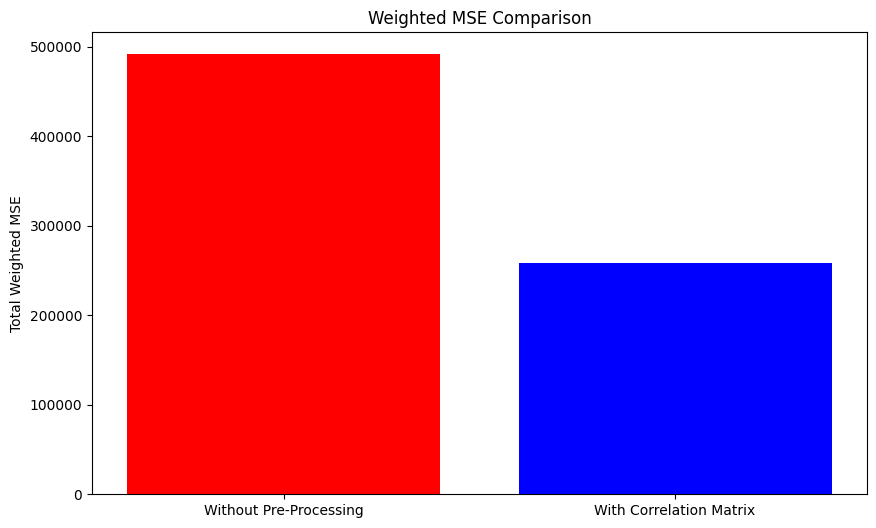

In [61]:
x_categories = ['Without Pre-Processing', 'With Correlation Matrix']
y_categories = [total_weighted_mse, total_weighted_mse_preprocessing]
print(total_weighted_mse_preprocessing)


plt.figure(figsize=(10, 6))
plt.bar(x_categories, y_categories, color = ['red', 'blue'])
plt.title('Weighted MSE Comparison')
plt.ylabel('Total Weighted MSE')
plt.show()